# Time Series Analysis using python
-----------------------------------------------------------------------------

Time-series data consists of observations recorded at consistent time intervals, which can range from hourly to annually. Time-Series Forecasting uses statistical models to predict future data based on past trends, while time series analysis applies statistical methods to understand and extract patterns for accurate forecasting. This analysis is crucial in various fields like finance, business, meteorology, and more, with stock index values and weather forecasts being common examples.

-----------------------------------------------------------------------------

Components of Time-Series:
-----------------------------------------------------------------------------
1. ### Trend

**Definition: The trend component represents the long-term progression of the series. It is the overall direction in which the data is moving over a long period.**

**Characteristics:**
**Can be upward, downward, or flat.
Reflects long-term growth, decline, or stability.**

2. ### Seasonality

**Definition: Seasonality refers to periodic fluctuations that occur at regular intervals due to seasonal factors, such as time of the year, month, week, or day.**

**Characteristics:
Regular and predictable patterns.
Repeat over a fixed period.**

3. ### Cyclic Patterns

**Definition: Cyclic patterns are fluctuations that occur over longer periods, not as regular or predictable as seasonality. They are influenced by economic, business, or other cycles.**

**Characteristics:
Longer duration than seasonal patterns.
Irregular intervals but some identifiable cycles.**

4. ### Irregularities

**Definition: The irregular component, also known as noise, represents random variations in the time series that cannot be attributed to trend, seasonality, or cyclic patterns.**

**Characteristics:
Random and unpredictable.
Does not follow any pattern.**


-----------------------------------------------------------------------------
### Summary

**Trend:** Long-term direction (upward, downward, or flat).

**Seasonality:** Regular, repeating patterns (e.g., yearly, monthly).

**Cyclic Patterns:** Long-term cycles influenced by broader factors (e.g., economic cycles).

**Irregularities (Noise):** Random, unpredictable variations.**

-----------------------------------------------------------------------------
#### Lets import important python libraries

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\akars\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import warnings
warnings.filterwarnings('ignore')  

**we'll be considering inbuilt 'flights' - dataset from seaborn for our analysis**

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

load the dataset and convert the year_month data type from str to datetime

In [5]:
df = sns.load_dataset('flights')
df['year_month'] = pd.to_datetime( "01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.set_index('year_month',inplace = True)
df.head()

,year,month,passengers
year_month,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='year_month', ylabel='passengers'>

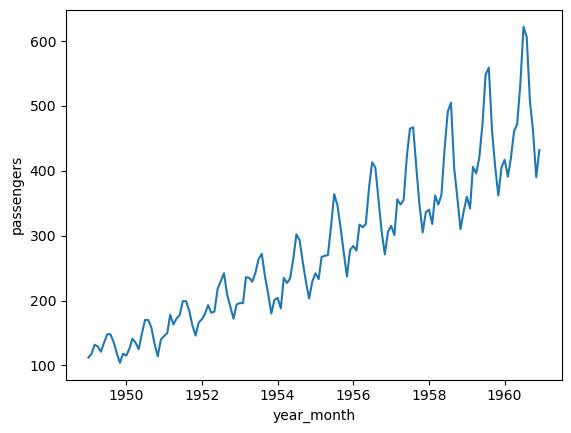

In [6]:
#plot a lineplot using seaborn
sns.lineplot(data = df, x= df.index, y= df.passengers)

**Now lets understand these crucial terminologies before we advance further in our analysis

----------------------------------------------------------------------------


## Stationary Time Series
Definition: A time series with statistical properties (mean, variance, autocorrelation) that remain constant over time.
Example: White noise

**Characteristics:
Constant mean
Constant variance
Constant autocorrelation
No trend
No seasonality**


## Non-Stationary Time Series
Definition: A time series with statistical properties that change over time.
Example: Random walk

**Characteristics:
Changing mean
Changing variance
Changing autocorrelation
Presence of trend
Presence of seasonality**







-----------------------------------------------------------------------------

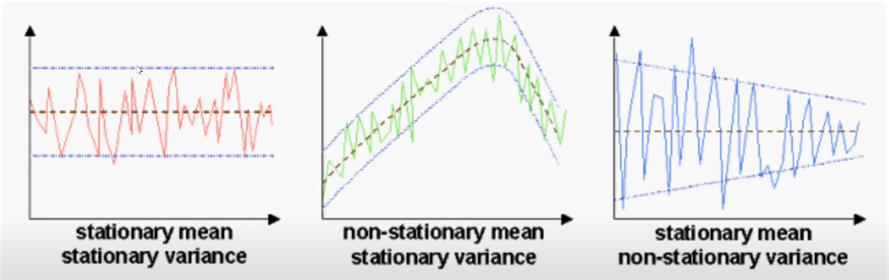

-----------------------------------------------------------------------------


### **Question : How to check if a time-series is stationary or not ??**

### **Answer :  We can use both visual inspection and statistical tests.** 
#### Visual Inspection 
**Plot the Time Series:** Look for trends, changing variance, or seasonality. A stationary series should appear more or less stable around a constant mean with constant variance.

#### Statistical Tests
**Augmented Dickey-Fuller (ADF) Test:**
 if p-value < 0.05: Reject 
𝐻o
​
  (series is stationary).
  and 
if p-value ≥ 0.05: Fail to reject 
𝐻o
​
  (series is non-stationary).

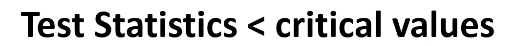

-----------------------------------------------------------------------------

lets apply these methods in our analysis

In [7]:
df['rollMean'] = df.passengers.rolling(window=12).mean()
df['rollStd'] = df.passengers.rolling(window=12).std()

<Axes: xlabel='year_month', ylabel='passengers'>

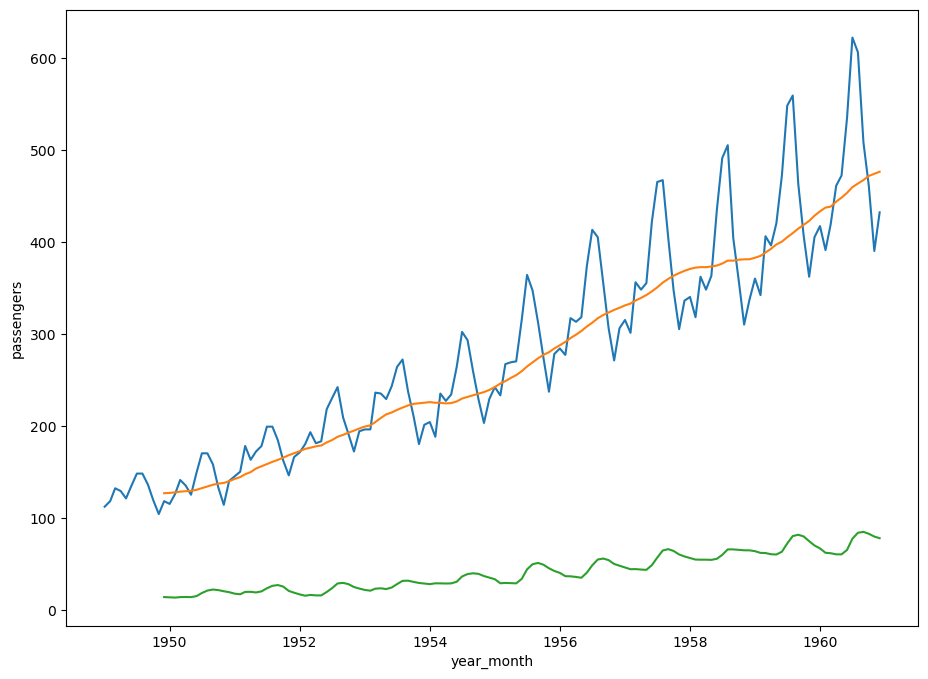

In [8]:
plt.figure(figsize=(11,8))
sns.lineplot(data=df, x=df.index, y=df.passengers)
sns.lineplot(data=df, x=df.index, y=df.rollMean)
sns.lineplot(data=df, x=df.index, y=df.rollStd)

from the above graph we can see that

1. The std. deviation is constant to timeline {green line}
2. The rolling mean (mean) is not constant with the timeline. {orange line}

which means our data is **not stationary**

------------------------------------------------------------------------

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adfTest = adfuller(df['passengers'], autolag='AIC')

In [11]:
adfTest

(0.8153688792060511,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [12]:
#providing necessary labels to above result for better understanding

stats = pd.Series(adfTest[0:4], index =['Test Statistics', 'p-value', '# lags used', 'number of observations used'])

stats

Test Statistics                  0.815369
p-value                          0.991880
# lags used                     13.000000
number of observations used    130.000000
dtype: float64

In [13]:
"""" now again providing appropiate labels to dictonary for better understanding 
from above adfTest result """

for key,values in adfTest[4].items():
    print('criticality',key,":",values)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


----------------------------------------------------------------------------
from the above resuts we have 

### **Test Statistics (0.815) > Critical values(-2)**
which implies that our data is **not stationary**

not this :::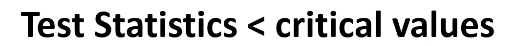

-----------------------------------------------------------------------------

lets proceed further
___________________________________________________________________________

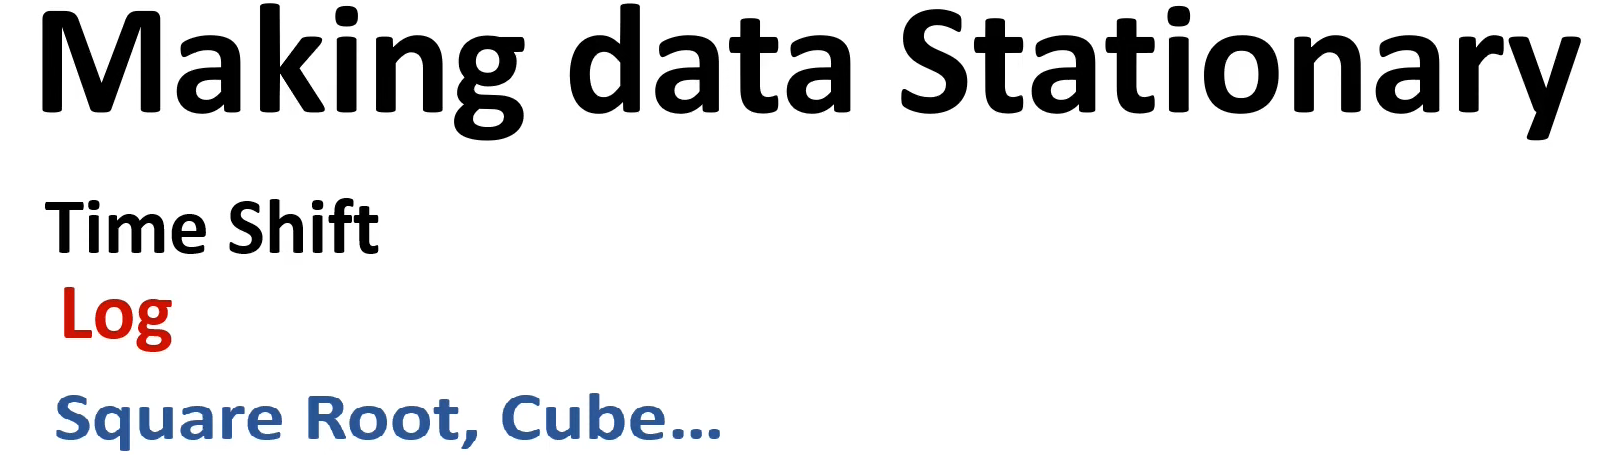

In [14]:
# creating a function:

def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)
        
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd')

In [15]:
df.head()

,year,month,passengers,rollMean,rollStd
year_month,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


In [16]:
# creating a new dataFrame from existing one
air_df = df[['passengers']]
air_df.head()

,passengers
year_month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# **1. Time Shift :**

In [17]:
# creating shifts
air_df['shift'] = air_df.passengers.shift()
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
air_df.head()

,passengers,shift,shiftDiff
year_month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


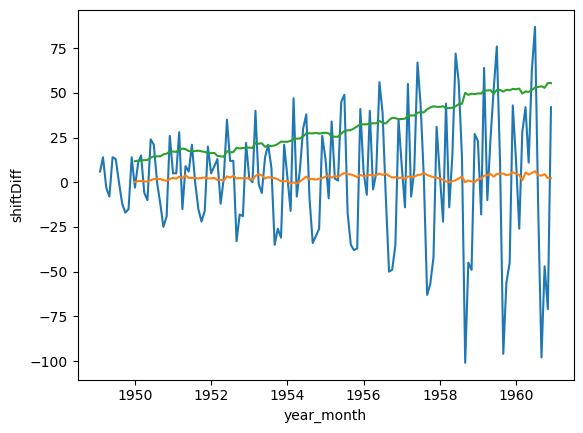

In [18]:
test_stationarity(air_df.dropna(),'shiftDiff')

# **2. Log :**

In [19]:
log_df = df[['passengers']]
log_df['log'] = np.log(log_df['passengers'])
log_df.head()

,passengers,log
year_month,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


Test Statistic                  -1.717017
p-value                          0.422367
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


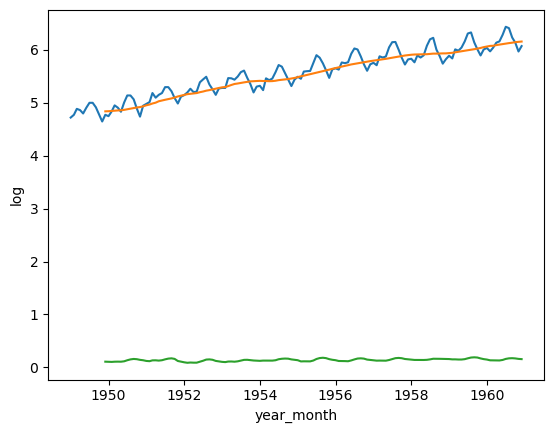

In [20]:
test_stationarity(log_df,'log')

# **3. Square Root :**

In [21]:
# square root
sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(df['passengers'])
sqrt_df.head()

,passengers,sqrt
year_month,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


Test Statistic                  -0.345854
p-value                          0.918754
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


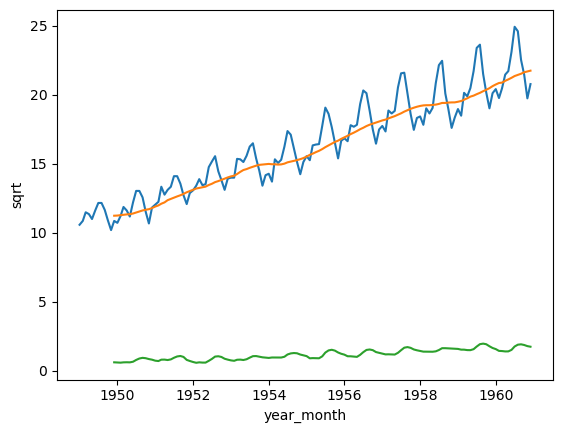

In [22]:
test_stationarity(sqrt_df,'sqrt')

# **4. Cube Root :**

In [23]:
# cuberoot

cbrt_df = df[['passengers']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])
cbrt_df.head()


,passengers,cbrt
year_month,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


Test Statistic                  -0.810035
p-value                          0.816157
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


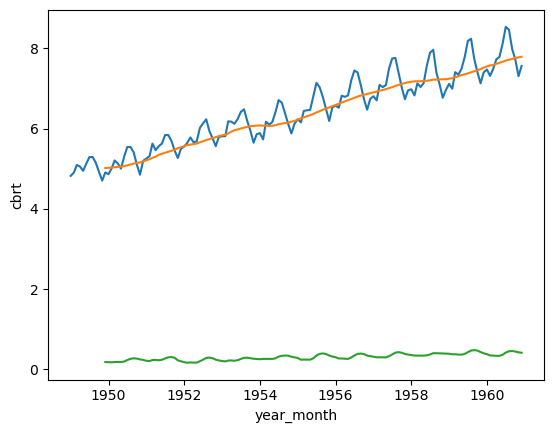

In [24]:
test_stationarity(cbrt_df,'cbrt')

# **5. Log Square Root :**

In [25]:
log_df2 = log_df[['passengers','log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

,passengers,log,log_sqrt,logShiftDiff
year_month,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


Test Statistic                  -2.611019
p-value                          0.090741
#lags used                      14.000000
number of observations used    128.000000
dtype: float64
criticality 1% : -3.4825006939887997
criticality 5% : -2.884397984161377
criticality 10% : -2.578960197753906


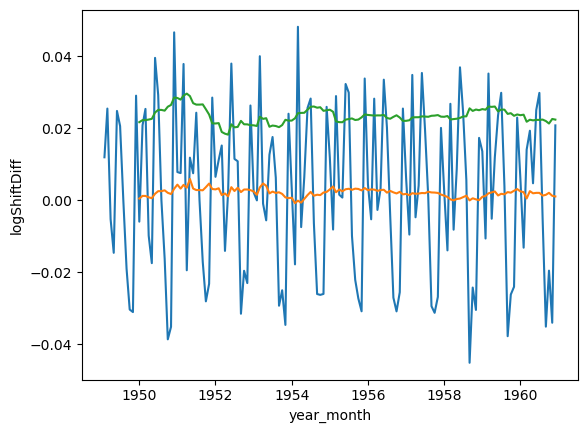

In [26]:
test_stationarity(log_df2.dropna(),'logShiftDiff')

# **6. Log Shift :**

In [27]:
#

log_shift = df[['passengers']].copy(deep=True)
log_shift['log'] = np.log(log_shift['passengers'])
log_shift['logShift'] = log_shift['log'].shift()
log_shift['logShiftDiff'] = log_shift['log'] - log_shift['logShift']
log_shift.head()

,passengers,log,logShift,logShiftDiff
year_month,,,,
1949-01-01,112,4.718499,NaN,NaN
1949-02-01,118,4.770685,4.718499,0.052186
1949-03-01,132,4.882802,4.770685,0.112117
1949-04-01,129,4.859812,4.882802,-0.022990
1949-05-01,121,4.795791,4.859812,-0.064022


Test Statistic                  -2.717131
p-value                          0.071121
#lags used                      14.000000
number of observations used    128.000000
dtype: float64
criticality 1% : -3.4825006939887997
criticality 5% : -2.884397984161377
criticality 10% : -2.578960197753906


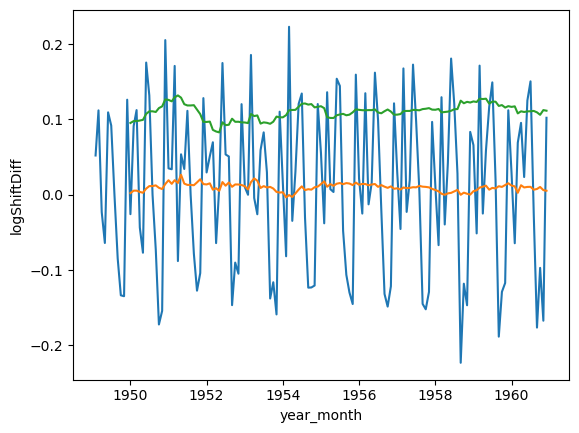

In [28]:
test_stationarity(log_shift.dropna(),'logShiftDiff')

### Next 2 - can be build on your own (i'm skipping them right now)

----------------------------------------------------------------------------

### Lets get started working with **ARIMA** and **SARIMAX** models for our Time-series forcasting

In [29]:
# I'm reffering to the original dataset for the analysis

airP = df[['passengers']].copy(deep=True)
airP['firstDiff'] = airP['passengers'].diff()  # 1 diff
airP['Diff12'] = airP['passengers'].diff(12)   # 12 diff considering seasonality over 12 months

airP.head()

,passengers,firstDiff,Diff12
year_month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


## Autoregressive Integrated Moving Averages - ARIMA

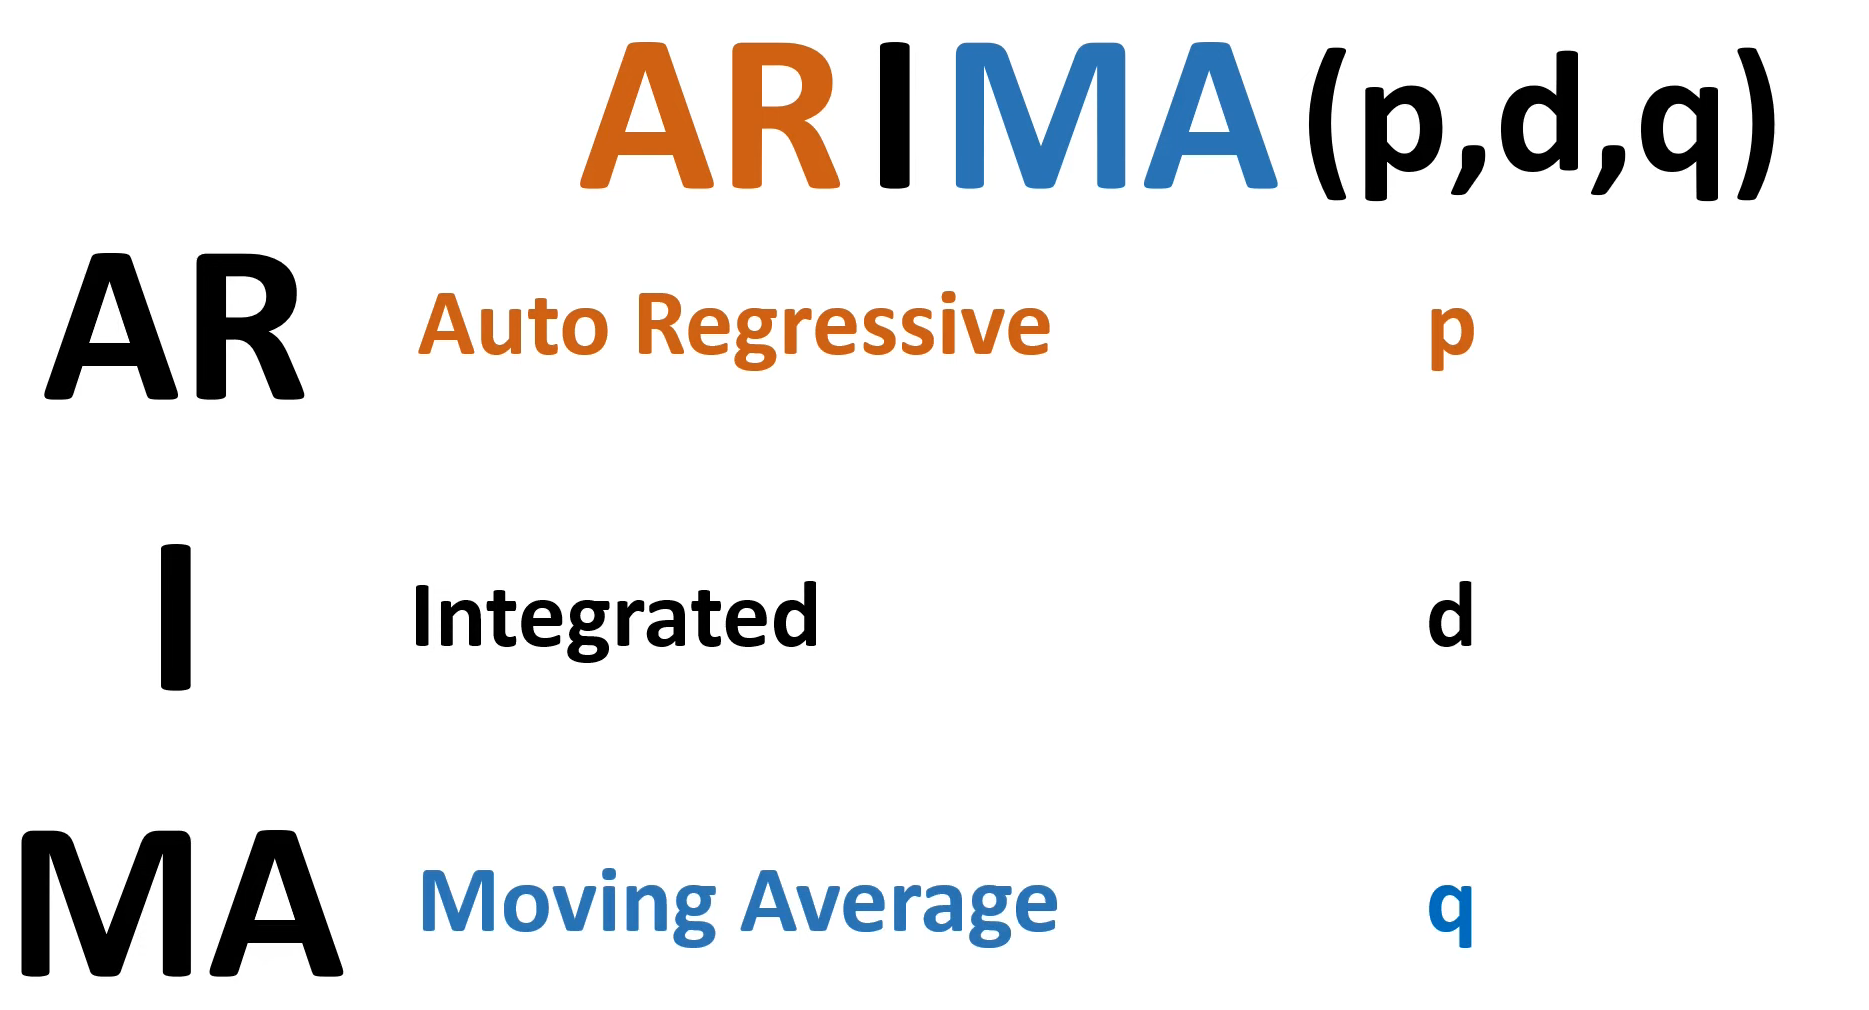

**Model Parameters: 
𝑝, 𝑑, q**

p:   Number of lag observations (AR terms)

Determines how many past values are used to predict the current value.
Identified using the Partial Autocorrelation Function (PACF).

d:   Number of times the data is differenced to achieve stationarity

Removes trends to stabilize the mean.
Identified by checking for stationarity after differencing.

q:   Number of lagged forecast errors (MA terms)

Determines how many past forecast errors are used to predict the current value.
Identified using the Autocorrelation Function (ACF).

In [30]:
# ARIMA model

from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


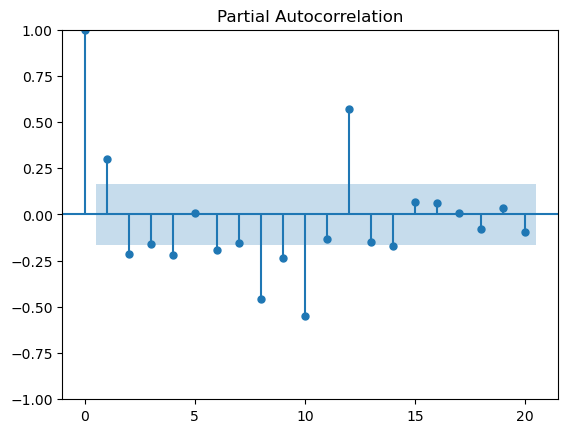

In [31]:
plot_pacf(airP['firstDiff'].dropna(),lags=20);

# from above
###### considering these
### p = 1, q = 3, d =1

## lets do train test split of dataframe  70:30 splitting-  manually
## 70% of airP(dataFrame) i.e144 will get into training and rest 30% of 144 will get into testing

In [32]:

train = airP[:round(len(airP)*70/100)]
test = airP[round(len(airP)*70/100):]
test.head()

,passengers,firstDiff,Diff12
year_month,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0


In [33]:
model = ARIMA(train['passengers'],order=(1,1,3))

model_fit = model.fit()

prediction = model_fit.predict(start=test.index[0],end=test.index[-1])

airP['arimaPred'] = prediction

airP.tail()

C:\Users\akars\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\akars\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\akars\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,passengers,firstDiff,Diff12,arimaPred
year_month,,,,
1960-08-01,606,-16.0,47.0,341.111333
1960-09-01,508,-98.0,45.0,341.111333
1960-10-01,461,-47.0,54.0,341.111333
1960-11-01,390,-71.0,28.0,341.111333
1960-12-01,432,42.0,27.0,341.111333


<Axes: xlabel='year_month', ylabel='passengers'>

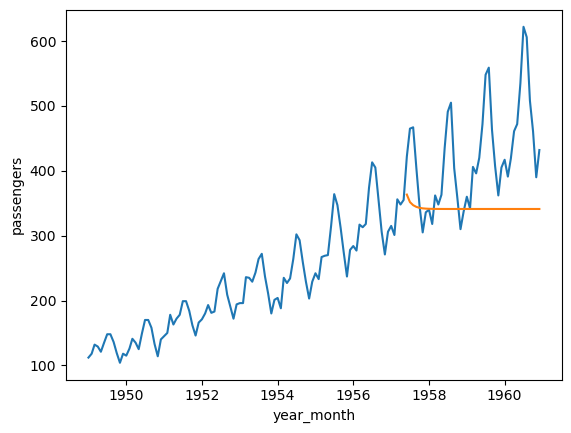

In [34]:
#plotting the line graphs
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')


In [35]:
from sklearn.metrics import mean_squared_error


np.sqrt(mean_squared_error(test['passengers'],prediction))


111.11010333240463

### **SARIMAX** model

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
airP.head()

,passengers,firstDiff,Diff12,arimaPred
year_month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,NaN,NaN
1949-04-01,129,-3.0,NaN,NaN
1949-05-01,121,-8.0,NaN,NaN


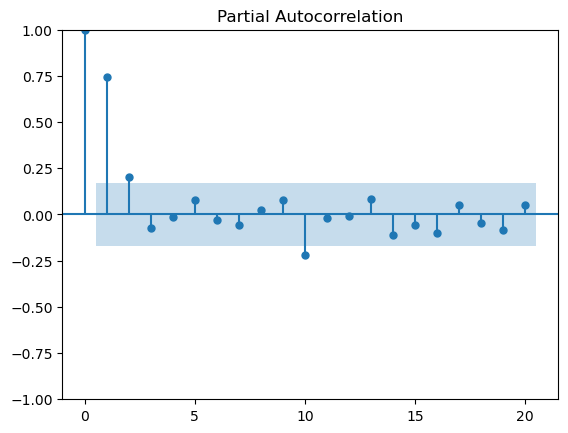

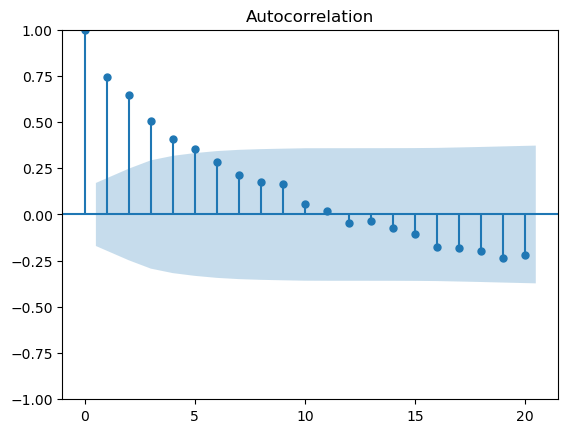

In [38]:

plot_pacf(airP['Diff12'].dropna(),lags=20);
plot_acf(airP['Diff12'].dropna(),lags=20);


In [39]:
model = SARIMAX(train['passengers'],order=(1,1,3),seasonal_order=(2,1,2,12))

model_fit = model.fit()

prediction = model_fit.predict(start=test.index[0],end=test.index[-1])

airP['sarimaxPred'] = prediction

airP.tail()



C:\Users\akars\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\akars\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,passengers,firstDiff,Diff12,arimaPred,sarimaxPred
year_month,,,,,
1960-08-01,606,-16.0,47.0,341.111333,598.359922
1960-09-01,508,-98.0,45.0,341.111333,533.989140
1960-10-01,461,-47.0,54.0,341.111333,478.764198
1960-11-01,390,-71.0,28.0,341.111333,431.409259
1960-12-01,432,42.0,27.0,341.111333,476.772463


<Axes: xlabel='year_month', ylabel='passengers'>

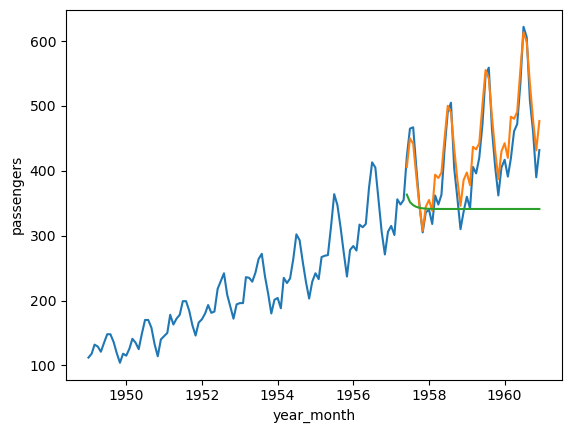

In [40]:
airP.dropna()

sns.lineplot(data=airP,x=airP.index,y='passengers') # blue line
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred') # orange line
sns.lineplot(data=airP,x=airP.index,y='arimaPred') # green line

#model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')


#### SARIMAX model is working quite well in predicting & is well aligned with actual test data

In [41]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

27.478167122709287

**the above RMS error is quite low in Sarimx in comparison to Arima **

#### Lets predict beyond  with our model i.e in upcoming dates what will be the prediction

In [42]:
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
futureDate.head()

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


In [43]:
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1])

1961-01-01    490.595570
1961-02-01    465.062937
1961-03-01    532.851299
1961-04-01    530.140048
1961-05-01    541.969085
1961-06-01    612.600934
1961-07-01    674.607722
1961-08-01    657.116015
1961-09-01    588.121655
1961-10-01    528.846095
1961-11-01    478.544233
1961-12-01    526.599041
1962-01-01    541.486913
1962-02-01    513.098734
1962-03-01    585.183901
1962-04-01    582.907679
1962-05-01    595.870786
1962-06-01    671.880825
1962-07-01    737.993671
1962-08-01    718.359909
1962-09-01    644.896013
1962-10-01    581.679646
1962-11-01    528.539990
1962-12-01    579.190341
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='year_month', ylabel='passengers'>

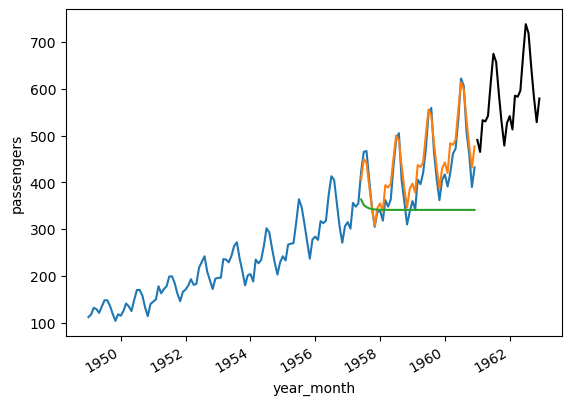

In [44]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')

 That's it for now, we have our future predictions

# THANK YOU !!